# Final Project Submission

Name: Justin Balwan

Pace: 60-Week-Pace


Instructor Name: Abhineet Kulkarni



# Overview

## The Business Problem Problem

As an employee for a real estate agency, I am analyzing information from the Kings County House Sales dataset. Given several factors from the dataset, I aim to provide advice to my agency on how home renovations will increase the values of homes in Kings County; more specifically, I aim to determine which home renovation factors are the most lucrative. By understanding which factors increase a home's value, my agency will be able to successfully help homeowners sell their homes for a maximized profit.

In [150]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report



from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.dummy import DummyRegressor

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [151]:
df = pd.read_csv('data/kc_house_data.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Data Understanding

From the data given, I want to further explore how my target variable "price" is represented in the Kings County Data Set by investigating its measures of central tendency. 

In [152]:
target_variable = df['price']

In [153]:
print(target_variable.describe())

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


From the above, we can see that ...

- The mean, or average, home price of a house in Kings County is $540,296

- The median home price $450,000

## Data Cleaning

From the original dataset, I am choosing to drop columns that will not contribute to the end goal.

- id
- date
- waterfront
- view
- grade
- sqft_above
- sqft_basement
- yr_renovated
- zipcode
- lat
- long
- sqft_living15
- sqft_lot15

In [154]:
df.drop(columns = ['id', 'date', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], inplace=True)

Below shows the variables, or home renovation factors, that I will be using. These factors are suitable for this task because I will need to determine which of them will be the most lucrative. In turn, this will increase the value of homes in Kings County.

In [155]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,yr_built
0,221900.0,3,1.00,1180,5650,1.0,Average,1955
1,538000.0,3,2.25,2570,7242,2.0,Average,1951
2,180000.0,2,1.00,770,10000,1.0,Average,1933
3,604000.0,4,3.00,1960,5000,1.0,Very Good,1965
4,510000.0,3,2.00,1680,8080,1.0,Average,1987
...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,Average,2009
21593,400000.0,4,2.50,2310,5813,2.0,Average,2014
21594,402101.0,2,0.75,1020,1350,2.0,Average,2009
21595,400000.0,3,2.50,1600,2388,2.0,Average,2004


#### Converting Non-Numeric Columns to Numeric

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   condition    21597 non-null  object 
 7   yr_built     21597 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 1.3+ MB


The only non-numeric column is condition.

Figuring out which column I need to drop from condition to use One Hot Encoder:

In [157]:
condition = df[['condition']]
ohe = OneHotEncoder(drop='first', categories="auto", sparse=False)
ohe.fit(condition)
condition_enc = ohe.transform(condition)
condition_enc = pd.DataFrame(condition_enc,
                             columns=['cond_fair','cond_good','cond_poor', 'cond_verygood'],
                             index=df.index)
df.drop('condition', axis=1, inplace=True)
df = pd.concat([df, condition_enc], axis=1)

In [158]:
print(ohe.get_feature_names())

['x0_Fair' 'x0_Good' 'x0_Poor' 'x0_Very Good']


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   yr_built       21597 non-null  int64  
 7   cond_fair      21597 non-null  float64
 8   cond_good      21597 non-null  float64
 9   cond_poor      21597 non-null  float64
 10  cond_verygood  21597 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 1.8 MB


In [160]:
continuous = ['price',
              'sqft_living',
              'sqft_lot',
             ]

categorical = [
               'cond_fair',
               'cond_good',
               'cond_poor',
               'cond_verygood',
               'bedrooms', # you cannot easily change the number of bedrooms; it's fixed
               'floors', # number of floors are set in a house; difficult to change
               'bathrooms',
               'yr_built',
              ]
#price	bedrooms	bathrooms	sqft_living	sqft_lot	floors	condition	yr_built

#### Categorical Variables

I will compute histograms to depict my categorical factors first, along with knowing how many of each home renovation factors there are for each.

Categories
cond_fair (2): [0. 1.]
cond_good (2): [0. 1.]
cond_poor (2): [0. 1.]
cond_verygood (2): [0. 1.]
bedrooms (12): [ 3  2  4  5  1  6  7  8  9 11 10 33]
floors (6): [1.  2.  1.5 3.  2.5 3.5]
bathrooms (29): [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75 6.25
 6.5 ]
yr_built (116): [1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 1942 1927 1977 1900
 1979 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929
 1981 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991
 1954 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988
 1962 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924
 1990 1914 1926 2004 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943
 1957 1940 1918 1928 1974 1911 1936 1937 1982 1908 1931 1998 1913 2013
 1907 1958 2012 1912 2011 1917 1932 1944 1902 2009 1903 1970 2015 1934
 1938 1919 1906 1935]


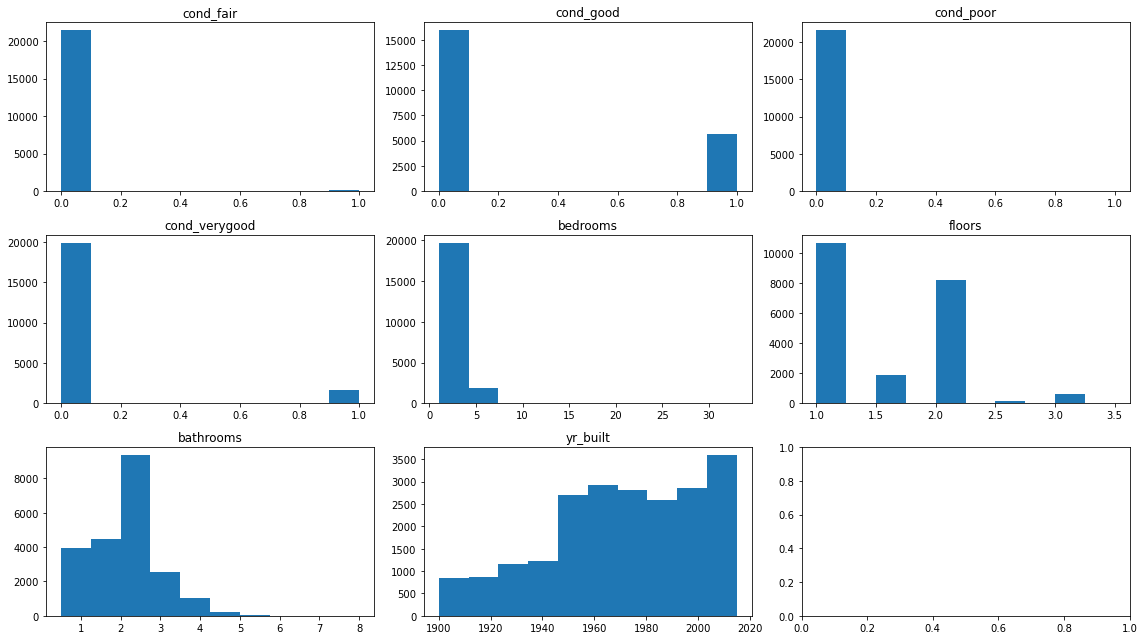

In [161]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(16,9))

for col, ax in zip(categorical, axes.flatten()):
    ax.hist(df[col])
    ax.set_title(col)
    
fig.tight_layout()
#print the name and number of each category, followed by the names of the categories therein
print('Categories')
for each in categorical:
    print('{} ({}): {}'.format(each, df[each].nunique(), df[each].unique()))
    #nunqiue returns the length of the array of the unique values for each column
    #unique returns an array of the unique values for each column

Interesting results! We can see that ... 
- There are 5 types of home conditions
- There are 12 types of bedrooms sizes
- There are 6 types/levels of floors
- There are 29 types of bathroom sizes
- There are homes that span over 116 years

More specifically ... 
- Most homes have an average condition
- Most homes have < 5 bedrooms
- Most homes have 1-2 floors
- Most homes have between 2-3 bathrooms
- More homes were being built as time progressed

#### Continuous Variables

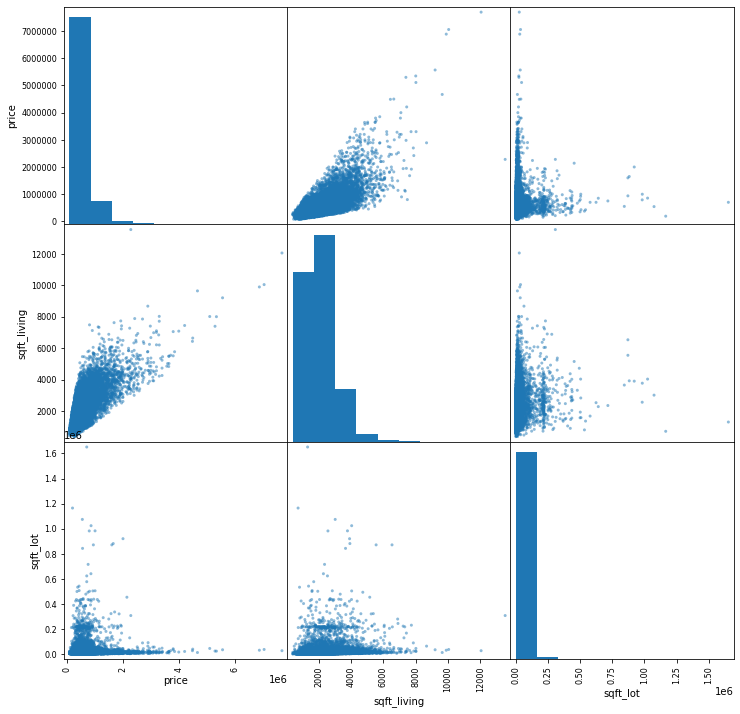

In [162]:
#Creating a scatter matrix to depict the continuous data
pd.plotting.scatter_matrix(df[continuous], figsize=(12,12))
plt.show()

What can we determine from this data? <Examine the first column!>

- Square foot of living has a STRONG correlation with price; we can assume that as the square foot of living increases, so does price.
- Square foot of lot has a high number of 0's. What does this mean? Does this indicate apartment building homes, which is more expansive vertically rather than horizontally (compared to regular flat homes), thus requiring not that much square foot of lot?

## Data Preparation

#### Baseline Model

The baseline model allows us to take the factors we selected from the Kings County housing dataset and predict the future home prices.

In [163]:
X = df['sqft_living']
y = df['price']
X = sm.add_constant(X)

In [164]:
# baseline
baseline = DummyRegressor()
baseline.fit(X, y)
print('Baseline Score R\u00b2:', baseline.score(X,y))
print()

Baseline Score R²: 0.0



In [165]:
baseline_score = baseline.score(X, y)

To find out the correlation of the variables in regards to the target variable "price":

In [166]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,cond_fair,cond_good,cond_poor,cond_verygood
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.053953,-0.051432,-0.030759,-0.019886,0.057531
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.155670,-0.049463,-0.009841,-0.032520,0.027500
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.507173,-0.075933,-0.166756,-0.042932,-0.034765
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.318152,-0.063984,-0.083850,-0.033246,-0.018284
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.052946,0.037871,0.013284,0.006265,-0.014452
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.489193,-0.055337,-0.257672,-0.023029,-0.120546
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,1.000000,-0.066977,-0.257155,-0.050621,-0.244382
cond_fair,-0.051432,-0.049463,-0.075933,-0.063984,0.037871,-0.055337,-0.066977,1.000000,-0.053190,-0.003266,-0.026044
cond_good,-0.030759,-0.009841,-0.166756,-0.083850,0.013284,-0.257672,-0.257155,-0.053190,1.000000,-0.021897,-0.174605
cond_poor,-0.019886,-0.032520,-0.042932,-0.033246,0.006265,-0.023029,-0.050621,-0.003266,-0.021897,1.000000,-0.010722


It appears that "price" vs. "sqft_living" is the most correlated, but let's check to make sure!

To double check this result, I will build a heatmap to visualize the correlation.

#### Building a Correlation Heatmap to Create a Baseline Model

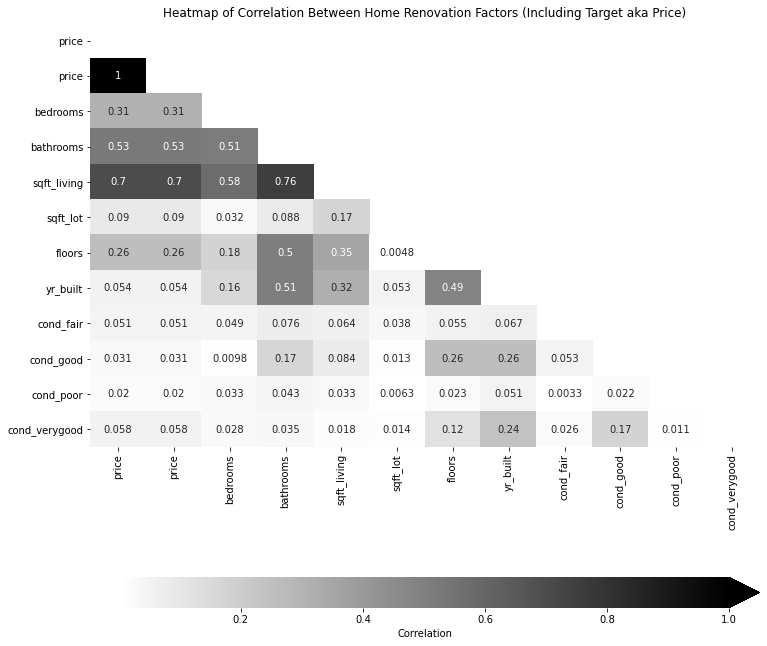

In [167]:
import seaborn as sns
import numpy as np

# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([df['price'], df], axis=1)
corr = np.abs(heatmap_data.corr())

# Set up figure and axes
fig, ax = plt.subplots(figsize=(12, 12))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # Changes color of the map
    cmap='binary',
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Home Renovation Factors (Including Target aka Price)");

In [168]:
most_correlated_feature = "sqft_living"

Square foot of living is the most correlated feature! The heat map result matches the result found from df.corr()

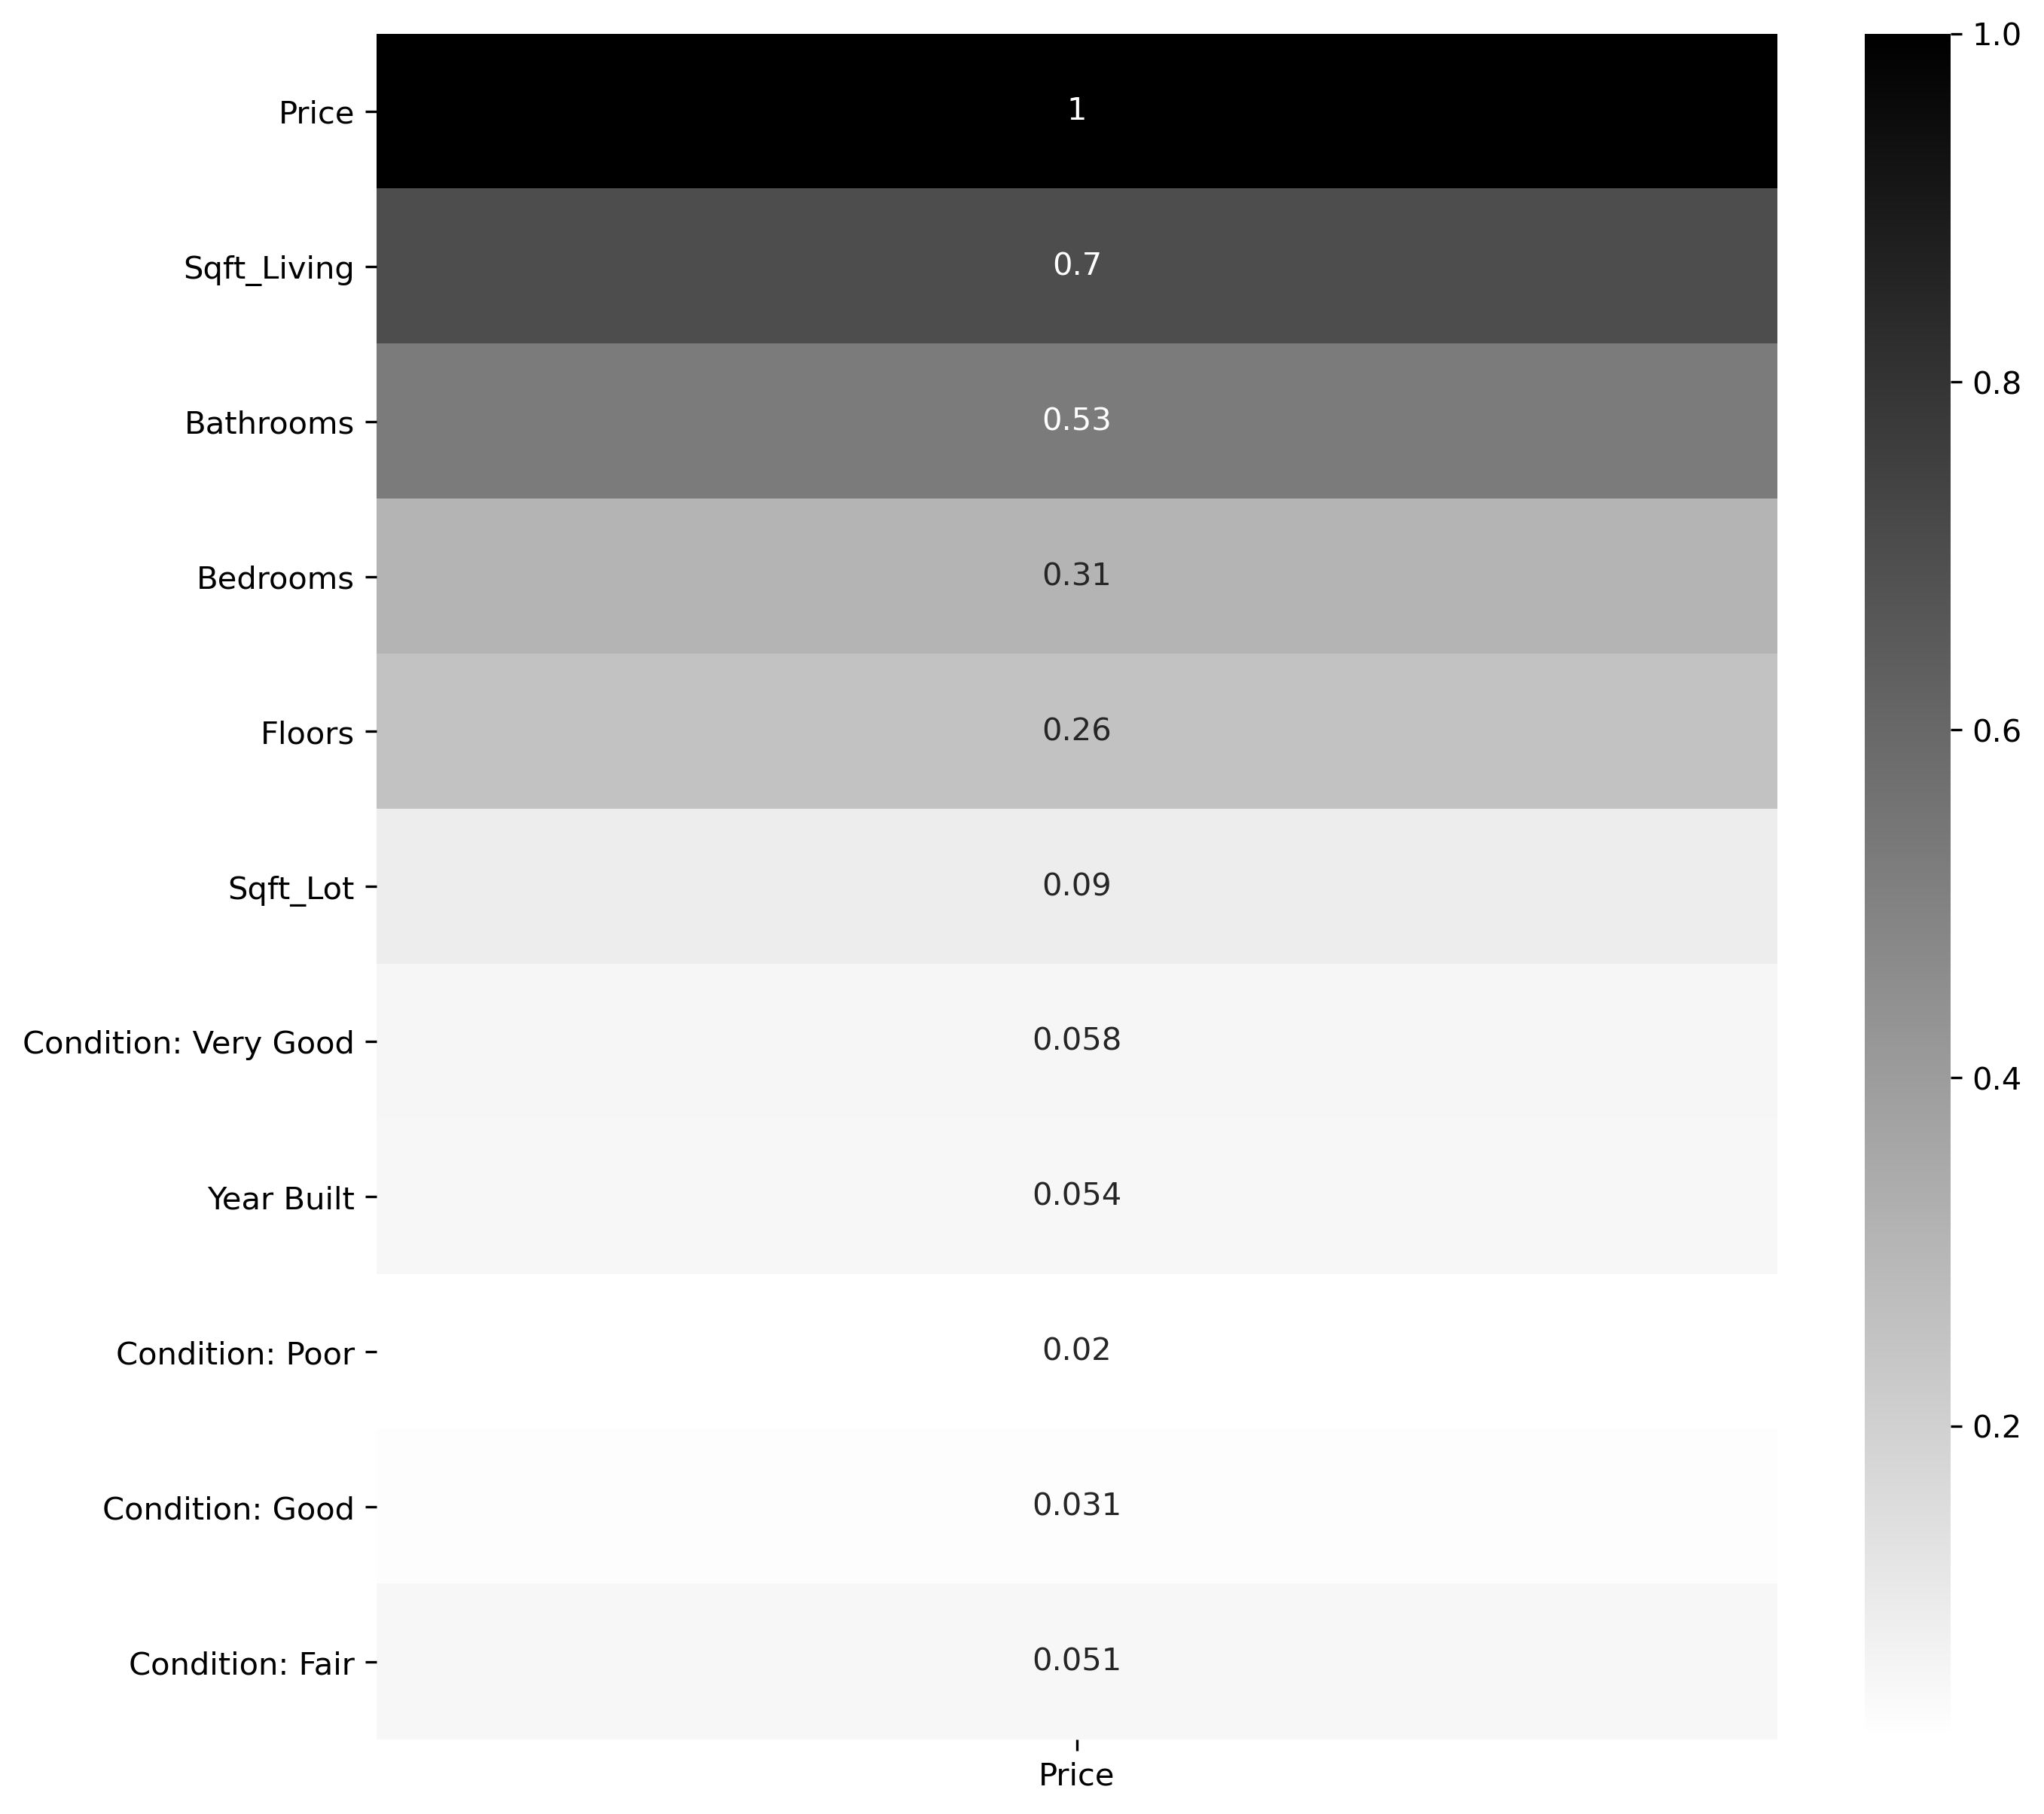

In [169]:
# Placing correlation in order (from strongest to weakest)
indx = df.corr().sort_values('price', ascending=False).index
df_sorted = df.loc[:, indx]

plt.figure(figsize=(10,10), dpi=300)
sns.heatmap(np.abs(df_sorted.corr()[['price']]),
            cmap="binary",
            xticklabels=['Price'],
            yticklabels=['Price', 'Sqft_Living', 'Bathrooms', 'Bedrooms',
                         'Floors', 'Sqft_Lot', 'Condition: Very Good', 'Year Built',
                        'Condition: Poor', 'Condition: Good', 'Condition: Fair'],
            annot=True)
plt.yticks(rotation=0);

# Will use this in presentation

Below, I will create a scatter matrix to show the numerous non-normal distributions that exist.

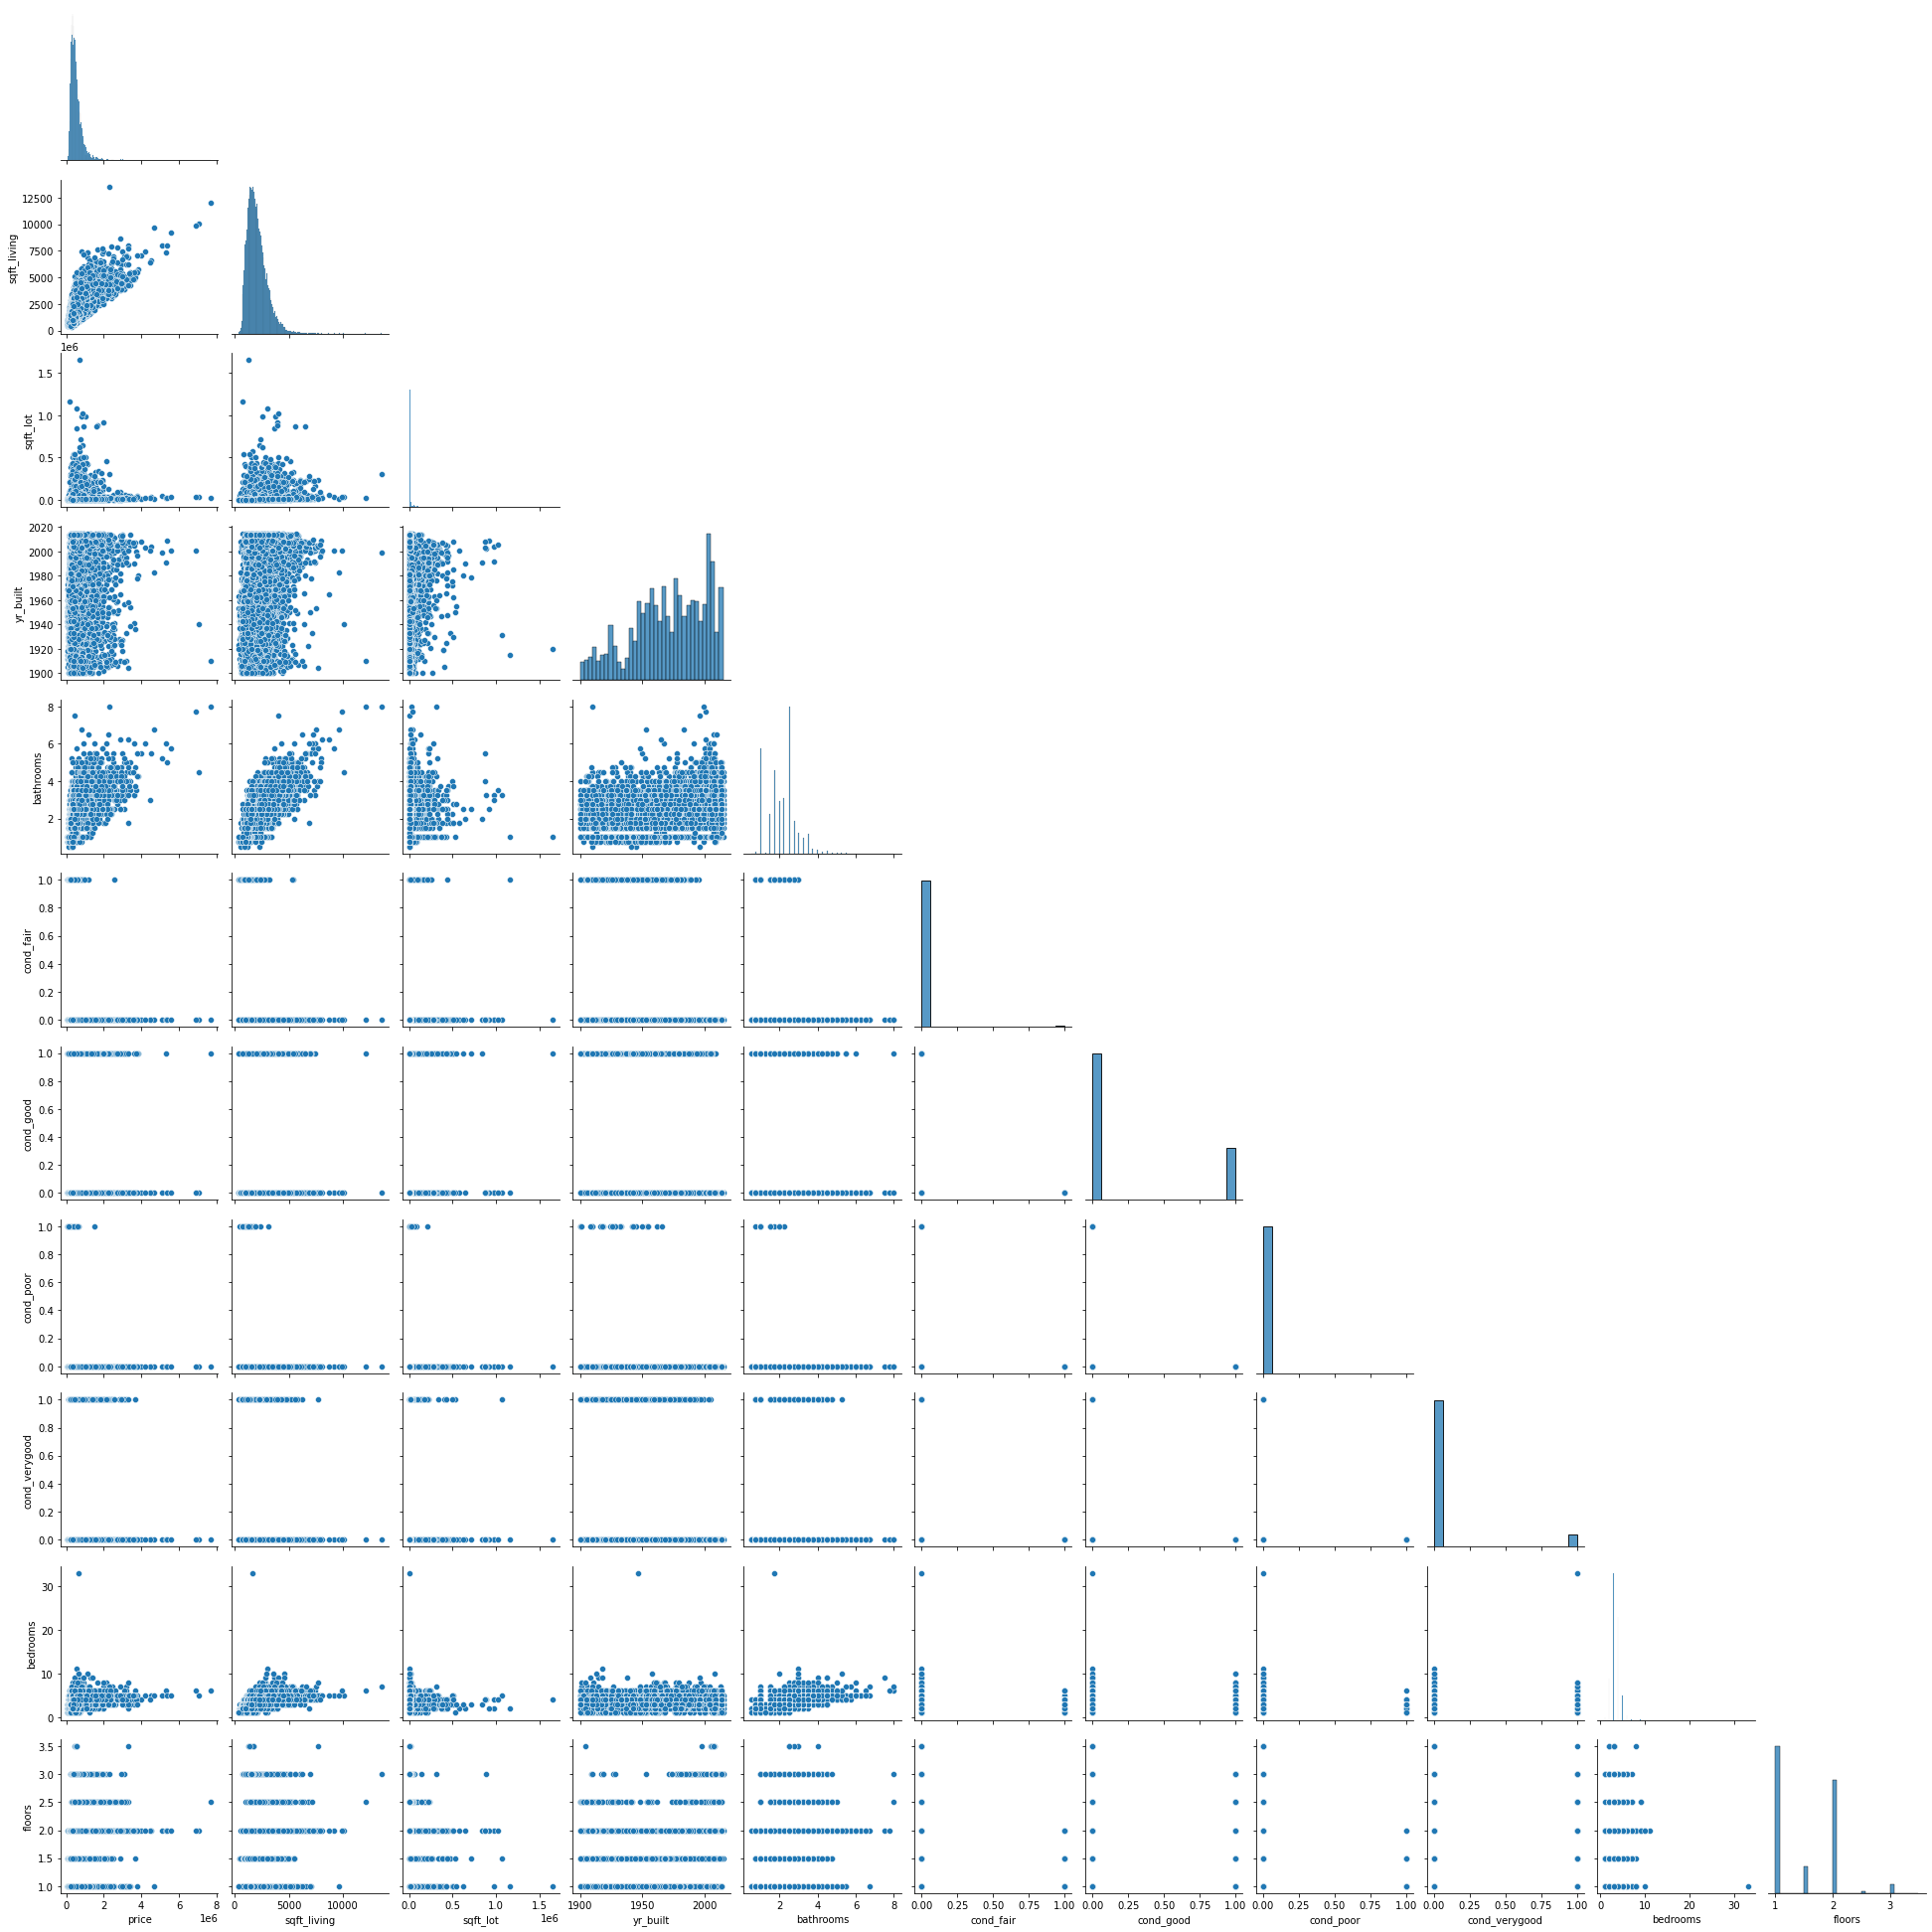

In [170]:
scatter_columns = ['price',
              'sqft_living',
              'sqft_lot',
              'yr_built',
              'bathrooms',
               'cond_fair',
               'cond_good',
               'cond_poor',
               'cond_verygood',
               'bedrooms',
               'floors', ]

df_scatter = df[scatter_columns]
sns.pairplot(df_scatter, corner=True);

## Modeling

#### Analyzing OLS Results

WHY ARE WE ANALYZING OLS RESULTS?
- Models in StatsModels, including OLS, are not really designed for predictive model validation, but they do give us a lot more statistical information.


Checking again what our dataframe looks like:

In [171]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,cond_fair,cond_good,cond_poor,cond_verygood
0,221900.0,3,1.00,1180,5650,1.0,1955,0.0,0.0,0.0,0.0
1,538000.0,3,2.25,2570,7242,2.0,1951,0.0,0.0,0.0,0.0
2,180000.0,2,1.00,770,10000,1.0,1933,0.0,0.0,0.0,0.0
3,604000.0,4,3.00,1960,5000,1.0,1965,0.0,0.0,0.0,1.0
4,510000.0,3,2.00,1680,8080,1.0,1987,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,2009,0.0,0.0,0.0,0.0
21593,400000.0,4,2.50,2310,5813,2.0,2014,0.0,0.0,0.0,0.0
21594,402101.0,2,0.75,1020,1350,2.0,2009,0.0,0.0,0.0,0.0
21595,400000.0,3,2.50,1600,2388,2.0,2004,0.0,0.0,0.0,0.0


In [172]:
# Analyzing OLS results

outcome = 'price'
# drop price b/c it's dependent variable
df1 = df.drop('price', axis=1)
predictors = '+'.join(df1.columns)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     2717.
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:52:40   Log-Likelihood:            -2.9859e+05
No. Observations:               21597   AIC:                         5.972e+05
Df Residuals:                   21586   BIC:                         5.973e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.306e+06   1.43e+05     44.160      0.000    6.03e+06    6.59e+06
bedrooms      -6.966e+04   2254.346    -30.900      0.000   -7.41e+04   -6.52e+04
bathrooms      6.549e+04   3863.211     16.953      0.000    5.79e+04    7.31e+04
sqft_living     303.8814      2.999    101.333      0.000     298.003     309.759
sqft_lot         -0.2967      0.041     -7.209      0.000      -0.377      -0.216
floors          5.67e+04   3828.141     14.812      0.000    4.92e+04    6.42e+04
yr_built      -3240.6402     73.739    -43.947      0.000   -3385.175   -3096.106
cond_fair     -4.622e+04    1.9e+04     -2.431      0.015   -8.35e+04   -8953.872
cond_good      1.147e+04   4130.227      2.777      0.005    3374.380    1.96e+04
cond_poor      -4.89e+04   4.56e+04     -1.073      0.283   -1.38e+05    4.04e+04
cond_verygood  3.996e+04   6658.786      6.002      0.000    2.69e+04     5.3e+04
==============================================================================
Omnibus:                    14394.294   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           532766.380
Skew:                           2.698   Prob(JB):                         0.00
Kurtosis:                      26.726   Cond. No.                     3.79e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Jarque-Bera, or JB, is very high, meaning there is a lot of non-normal distributions.
- There is strong multicollinearity

DEFINITION: Heteroscedasticity - happens when the standard deviations of a predicted variable, monitored over different values of an independent variable or as related to prior time periods, are non-constant (creating a funnel-like shape rather than a flat, spread out shape due to constant outputs).

#### Simple Linear Regression Model

Let's test whether our two most correlated variables are causing the strong multicollinearity by removing them from our dataframe.

In [173]:
X1 = df.drop(['price', 'sqft_living'], axis=1)
y1 = df['price']
X = sm.add_constant(X1)

In [174]:
model = sm.OLS(y1, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     1273.
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:52:40   Log-Likelihood:            -3.0279e+05
No. Observations:               21597   AIC:                         6.056e+05
Df Residuals:                   21587   BIC:                         6.057e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.312e+06   1.73e+05     42.257

In [175]:
simple_score = model.rsquared

In [176]:
print('Simple Linear Regression R²:', simple_score)
print()

Simple Linear Regression R²: 0.34665470419864375



In [177]:
simple_linear_coef = model.params

In [178]:
simple_linear_coef

const            7.312179e+06
bedrooms         6.389515e+03
bathrooms        2.968106e+05
sqft_lot         4.599957e-01
floors           6.682462e+04
yr_built        -3.822594e+03
cond_fair       -7.828110e+04
cond_good        1.780274e+04
cond_poor       -5.626776e+04
cond_verygood    2.693108e+04
dtype: float64

The R-Squared decreased with them removed. Let's examine these two variables on their own.

#### First Multiple Linear Regression Model

In [179]:
# OLS between 'price' and 'sqft_living'
f = 'price~sqft_living'
model = ols(f, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:52:40   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [180]:
first_score = model.rsquared

In [181]:
print('First Multiple Linear Regression Model R\u00b2:', first_score)
print()

First Multiple Linear Regression Model R²: 0.49268789904035093



In [182]:
first_multiple_linear_coef = model.params

In [183]:
first_multiple_linear_coef

Intercept     -43988.892194
sqft_living      280.863014
dtype: float64

There is an indication of strong multicollinerarity; multicollinerarity undermines the significance of the independent variable.

After further research, I learned that multicollinerarity may exist with the problem of heteroscedasticity. Let's check for the latter via plots:

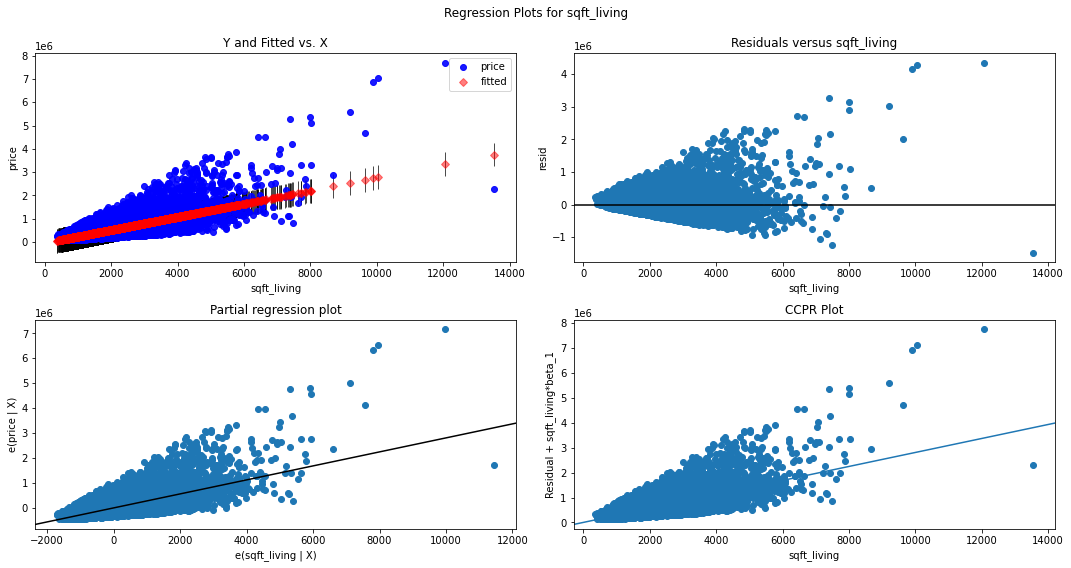

In [184]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig=fig);

In the plot titled 'Residuals versus sqft_living', we can see that there is a funnel-like shape.

#### Second Multiple Linear Regression Model (Simple Linear Logged)

In [185]:
# Normalizing distribution using log transformation

df2 = df.copy()
df2['price_log'] = np.log(df2['price'])
df2['sqft_living_log'] = np.log(df2['sqft_living'])
df2 = df2.drop(['price', 'sqft_living'], axis=1)

# Create an OLS between 'price_log' and 'sqft_living_log'

f = 'price_log~sqft_living_log'
model = ols(f, df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.805e+04
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:52:41   Log-Likelihood:                -10231.
No. Observations:               21597   AIC:                         2.047e+04
Df Residuals:                   21595   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.7234      0.047    142.612      0.000       6.631       6.816
sqft_living_log     0.8376      0.006    134.368      0.000       0.825       0.850
==============================================================================
Omnibus:                      123.577   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.096
Skew:                           0.143   Prob(JB):                     1.68e-25
Kurtosis:                       2.787   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
second_score = model.rsquared

In [187]:
print('Second Multiple Linear Regression Model R²:', second_score)
print()

Second Multiple Linear Regression Model R²: 0.45535727584899854



In [188]:
second_multiple_linear_coef = (model.params)

In [189]:
second_multiple_linear_coef

Intercept          6.723413
sqft_living_log    0.837642
dtype: float64

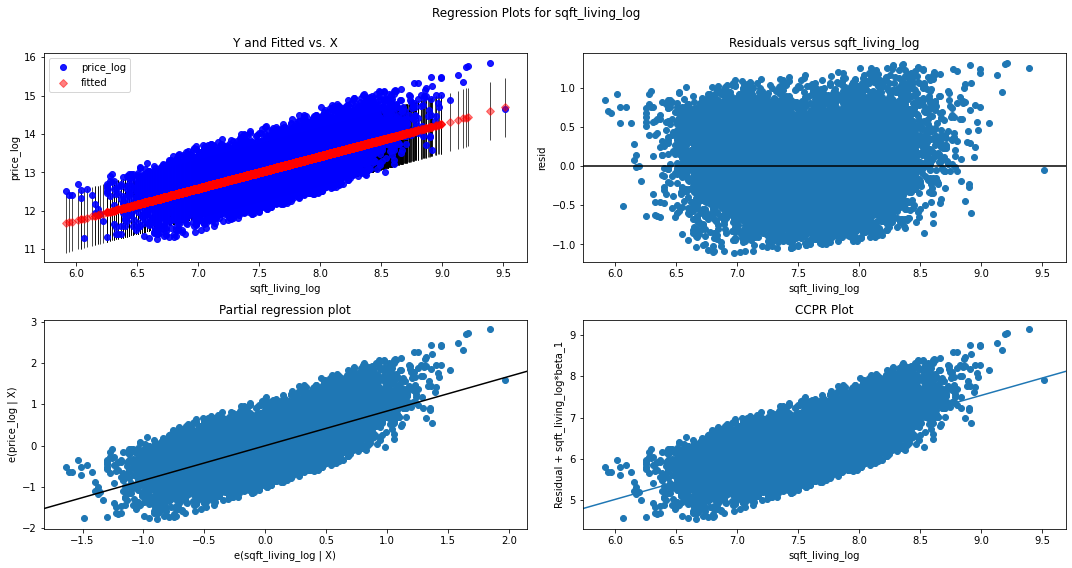

In [190]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living_log', fig=fig);

There is less of a funnel shape, so we are not violating the homoscedasticity assumption.

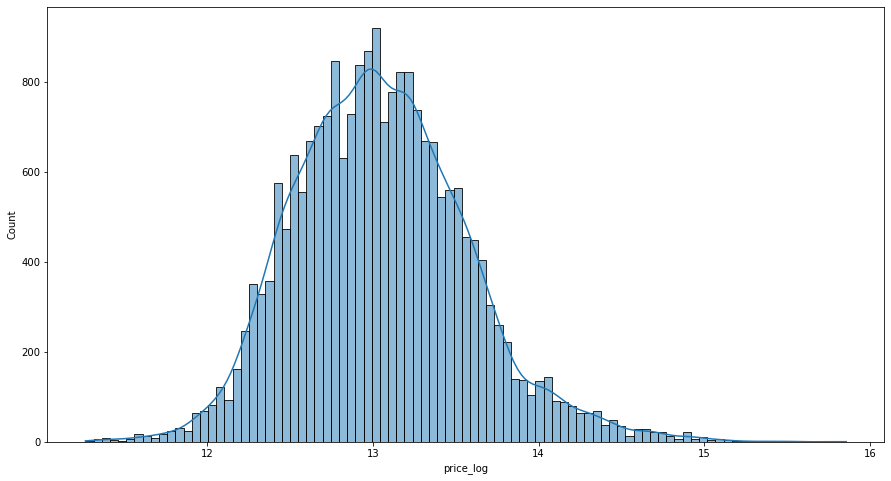

In [191]:
plt.figure(figsize=(15,8))
sns.histplot(df2['price_log'], kde=True);

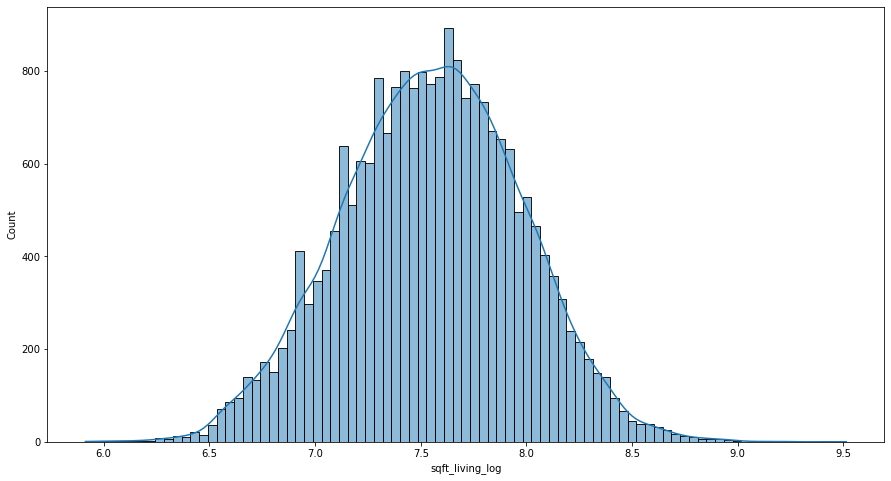

In [192]:
plt.figure(figsize=(15,8))
sns.histplot(df2['sqft_living_log'], kde=True);

#### Third Multiple Linear Regression Model

We have one final predictor model: sqft_lot! Let's log this predictor variable.

In [193]:
df3 = df2.copy()
df3

,bedrooms,bathrooms,sqft_lot,floors,yr_built,cond_fair,cond_good,cond_poor,cond_verygood,price_log,sqft_living_log
0,3,1.00,5650,1.0,1955,0.0,0.0,0.0,0.0,12.309982,7.073270
1,3,2.25,7242,2.0,1951,0.0,0.0,0.0,0.0,13.195614,7.851661
2,2,1.00,10000,1.0,1933,0.0,0.0,0.0,0.0,12.100712,6.646391
3,4,3.00,5000,1.0,1965,0.0,0.0,0.0,1.0,13.311329,7.580700
4,3,2.00,8080,1.0,1987,0.0,0.0,0.0,0.0,13.142166,7.426549
...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1131,3.0,2009,0.0,0.0,0.0,0.0,12.793859,7.333023
21593,4,2.50,5813,2.0,2014,0.0,0.0,0.0,0.0,12.899220,7.745003
21594,2,0.75,1350,2.0,2009,0.0,0.0,0.0,0.0,12.904459,6.927558
21595,3,2.50,2388,2.0,2004,0.0,0.0,0.0,0.0,12.899220,7.377759


In [194]:
# Our last predictor variable: sqft_lot

In [195]:
df3['sqft_lot_log'] = np.log(df3['sqft_lot'])
df3 = df3.drop(['sqft_lot'], axis=1)

In [196]:
X3 = df3.drop(['price_log'], axis=1)
y3 = df3['price_log']
X = sm.add_constant(X3)

In [197]:
model = sm.OLS(y3, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     2477.
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:52:44   Log-Likelihood:                -8538.6
No. Observations:               21597   AIC:                         1.710e+04
Df Residuals:                   21586   BIC:                         1.719e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              16.7813      0.219     

In [198]:
third_score = model.rsquared

In [199]:
print('Third Multiple Linear Regression Model R²:', third_score)
print()

Third Multiple Linear Regression Model R²: 0.5343447212266113



In [200]:
third_multiple_linear_coef = (model.params)

In [201]:
third_multiple_linear_coef

const              16.781252
bedrooms           -0.091067
bathrooms           0.130366
floors              0.113867
yr_built           -0.005164
cond_fair          -0.193930
cond_good           0.010736
cond_poor          -0.200616
cond_verygood       0.053917
sqft_living_log     0.872357
sqft_lot_log       -0.031689
dtype: float64

In [202]:
third_model_residual = model.resid

In [203]:
third_model_residual

0       -0.242441
1       -0.325460
2       -0.265913
3        0.140436
4        0.327790
           ...   
21592   -0.180538
21593   -0.151939
21594    0.540321
21595   -0.002475
21596    0.315090
Length: 21597, dtype: float64

## Visualizations

### Analyzing Final Model For Normality, Multicollinerarity, and Heteroscedaticity

#### Creating a QQ Plot For Normality

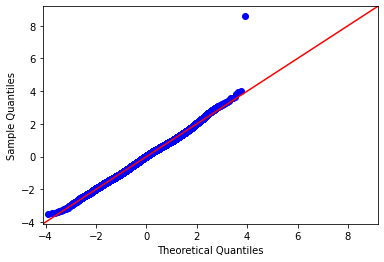

In [204]:
sm.graphics.qqplot(third_model_residual, dist=stats.norm, line='45', fit=True);

We are not violating the normality assumption. The data matches the line of best fit, and there seems to be one outlier that does not have a large impact on our model.

#### Check VIF Scores For Multicollinerarity

In [205]:
df3['constants'] = 1

In [206]:
X = df3.drop('price_log', axis=1)

In [207]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [208]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [209]:
print('Variance Inflation Factor:\n', vif_data)

Variance Inflation Factor:
             feature          VIF
0          bedrooms     1.681446
1         bathrooms     3.133105
2            floors     1.745431
3          yr_built     1.692833
4         cond_fair     1.023185
5         cond_good     1.201143
6         cond_poor     1.007155
7     cond_verygood     1.162042
8   sqft_living_log     3.401607
9      sqft_lot_log     1.380114
10        constants  8038.472659


There are some high VIF scores, indicating multicollinerarity.

#### Checking For Homoscedasticity

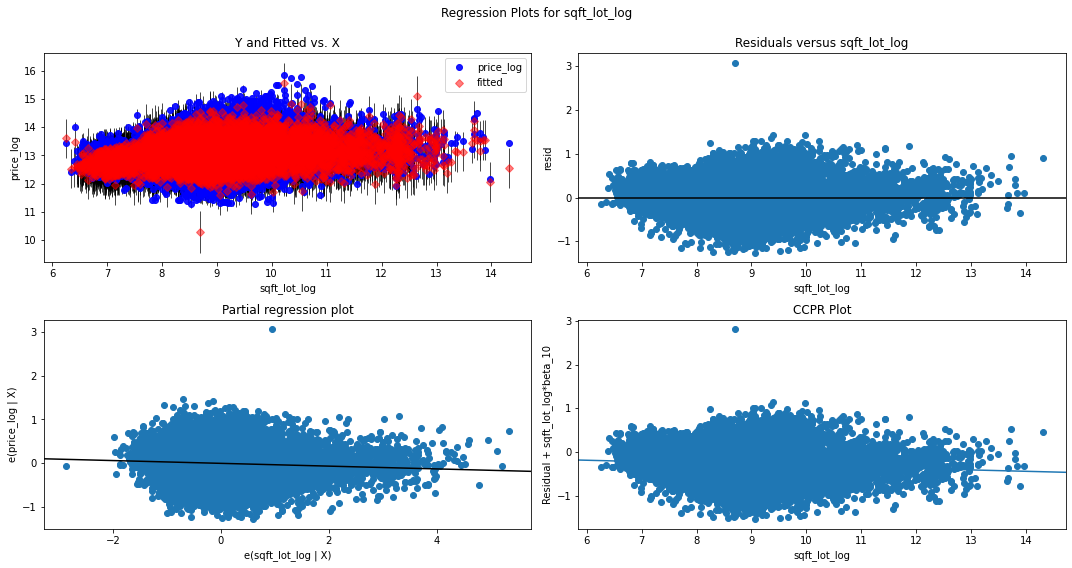

In [210]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_lot_log', fig=fig);
# Look at the plot titled 'Residuals versus sqft_lot_log'

It is somewhat spread out; definitely not as homoscedatistic as when sqft_lot_log was not included, but it is not enough to be considered heteroscedatistic.

In [211]:
df3.corr()

,bedrooms,bathrooms,floors,yr_built,cond_fair,cond_good,cond_poor,cond_verygood,price_log,sqft_living_log,sqft_lot_log,constants
bedrooms,1.000000,0.514508,0.177944,0.155670,-0.049463,-0.009841,-0.032520,0.027500,0.343360,0.621820,0.184922,NaN
bathrooms,0.514508,1.000000,0.502582,0.507173,-0.075933,-0.166756,-0.042932,-0.034765,0.551249,0.762135,0.100624,NaN
floors,0.177944,0.502582,1.000000,0.489193,-0.055337,-0.257672,-0.023029,-0.120546,0.310630,0.367564,-0.237460,NaN
yr_built,0.155670,0.507173,0.489193,1.000000,-0.066977,-0.257155,-0.050621,-0.244382,0.080583,0.349689,-0.007287,NaN
cond_fair,-0.049463,-0.075933,-0.055337,-0.066977,1.000000,-0.053190,-0.003266,-0.026044,-0.086095,-0.080514,0.039071,NaN
cond_good,-0.009841,-0.166756,-0.257672,-0.257155,-0.053190,1.000000,-0.021897,-0.174605,-0.040810,-0.077106,0.122765,NaN
cond_poor,-0.032520,-0.042932,-0.023029,-0.050621,-0.003266,-0.021897,1.000000,-0.010722,-0.037285,-0.044193,0.015156,NaN
cond_verygood,0.027500,-0.034765,-0.120546,-0.244382,-0.026044,-0.174605,-0.010722,1.000000,0.061148,-0.016130,-0.002852,NaN
price_log,0.343360,0.551249,0.310630,0.080583,-0.086095,-0.040810,-0.037285,0.061148,1.000000,0.674802,0.138261,NaN
sqft_living_log,0.621820,0.762135,0.367564,0.349689,-0.080514,-0.077106,-0.044193,-0.016130,0.674802,1.000000,0.325983,NaN


### Comparing Models With Their R-Squared Values

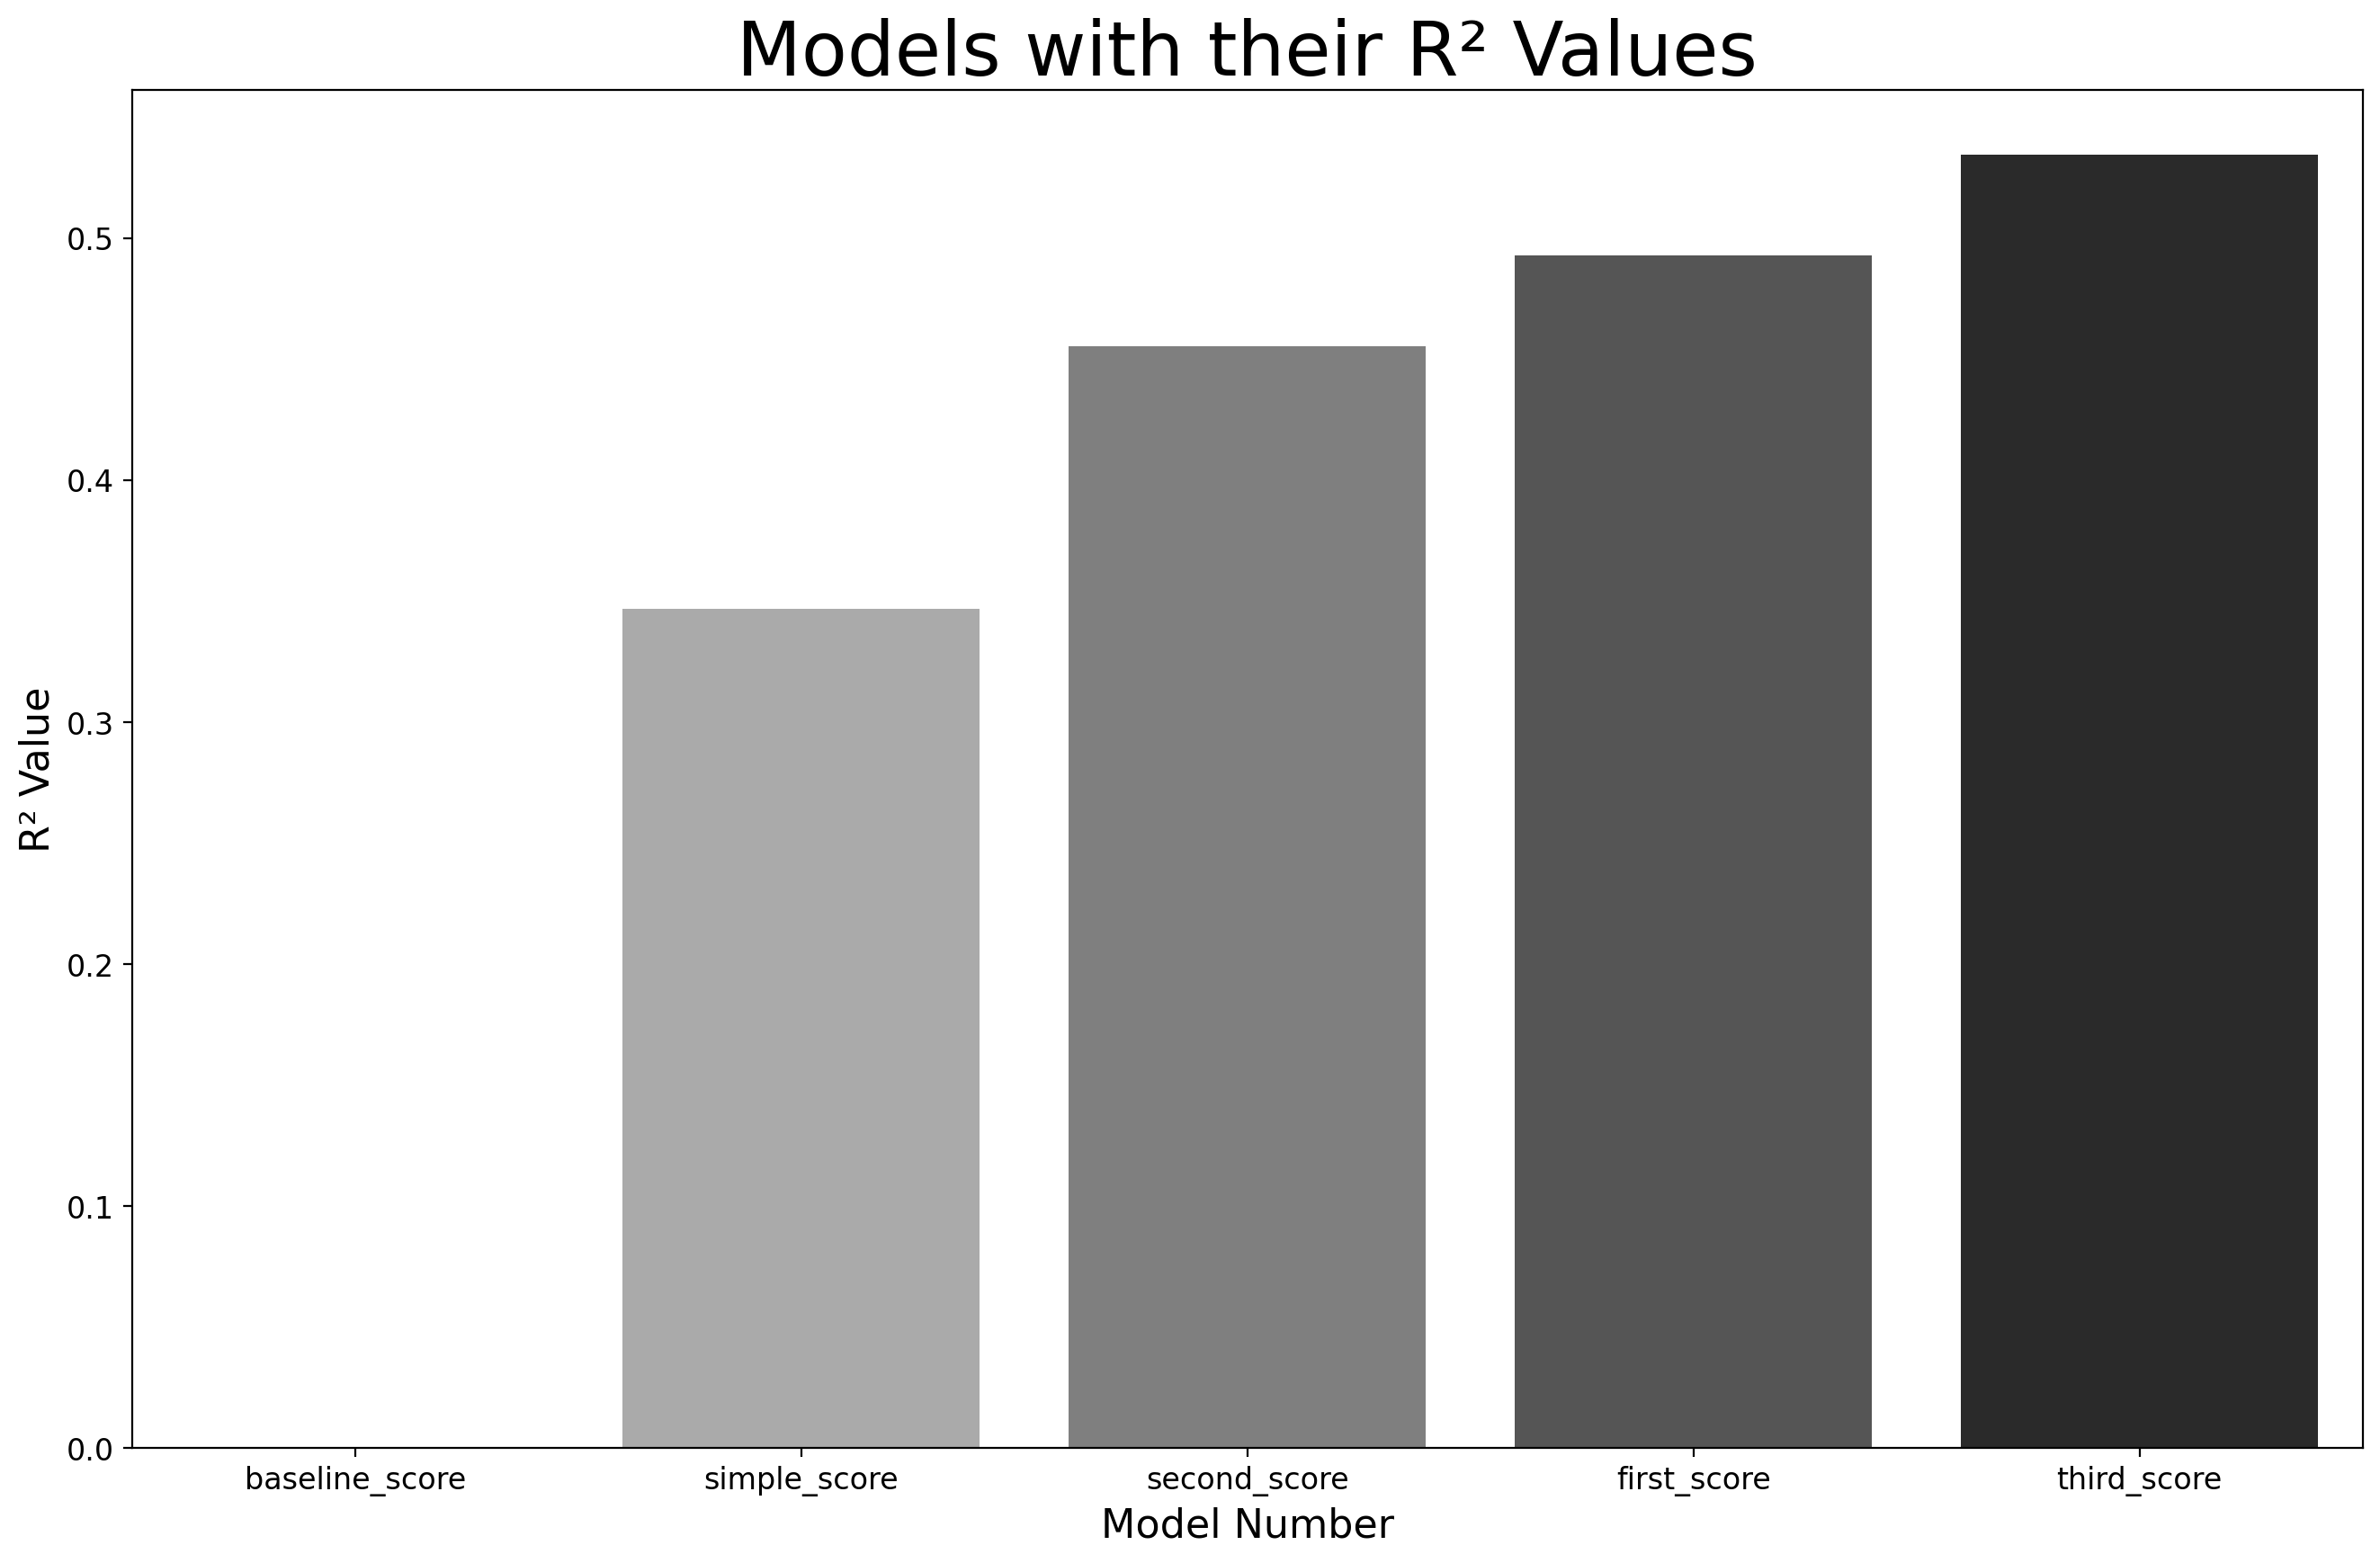

In [212]:
barchart = pd.DataFrame({'Model':['baseline_score', 'simple_score', 'second_score', 'first_score', 'third_score'],
                         'R\u00b2':[baseline_score, simple_score, second_score, first_score, third_score]})
plt.figure(figsize=(16,10), dpi=200)
ax = sns.barplot(x=barchart['Model'], y=barchart['R\u00b2'], palette="binary")
plt.title("Models with their R\u00b2 Values", fontsize=30)
ax.set_xlabel('Model Number', fontsize=16)
ax.set_ylabel('R\u00b2 Value', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

### Comparing Price Predictors Based on Regression Coefficients

In [213]:
plotdf = pd.DataFrame({'Predictor':['sqft_living_log', 'sqft_lot_log'],
                       'Coefficient':[0.872357, -0.031689]})
plotdf = plotdf.sort_values(by=['Coefficient'])

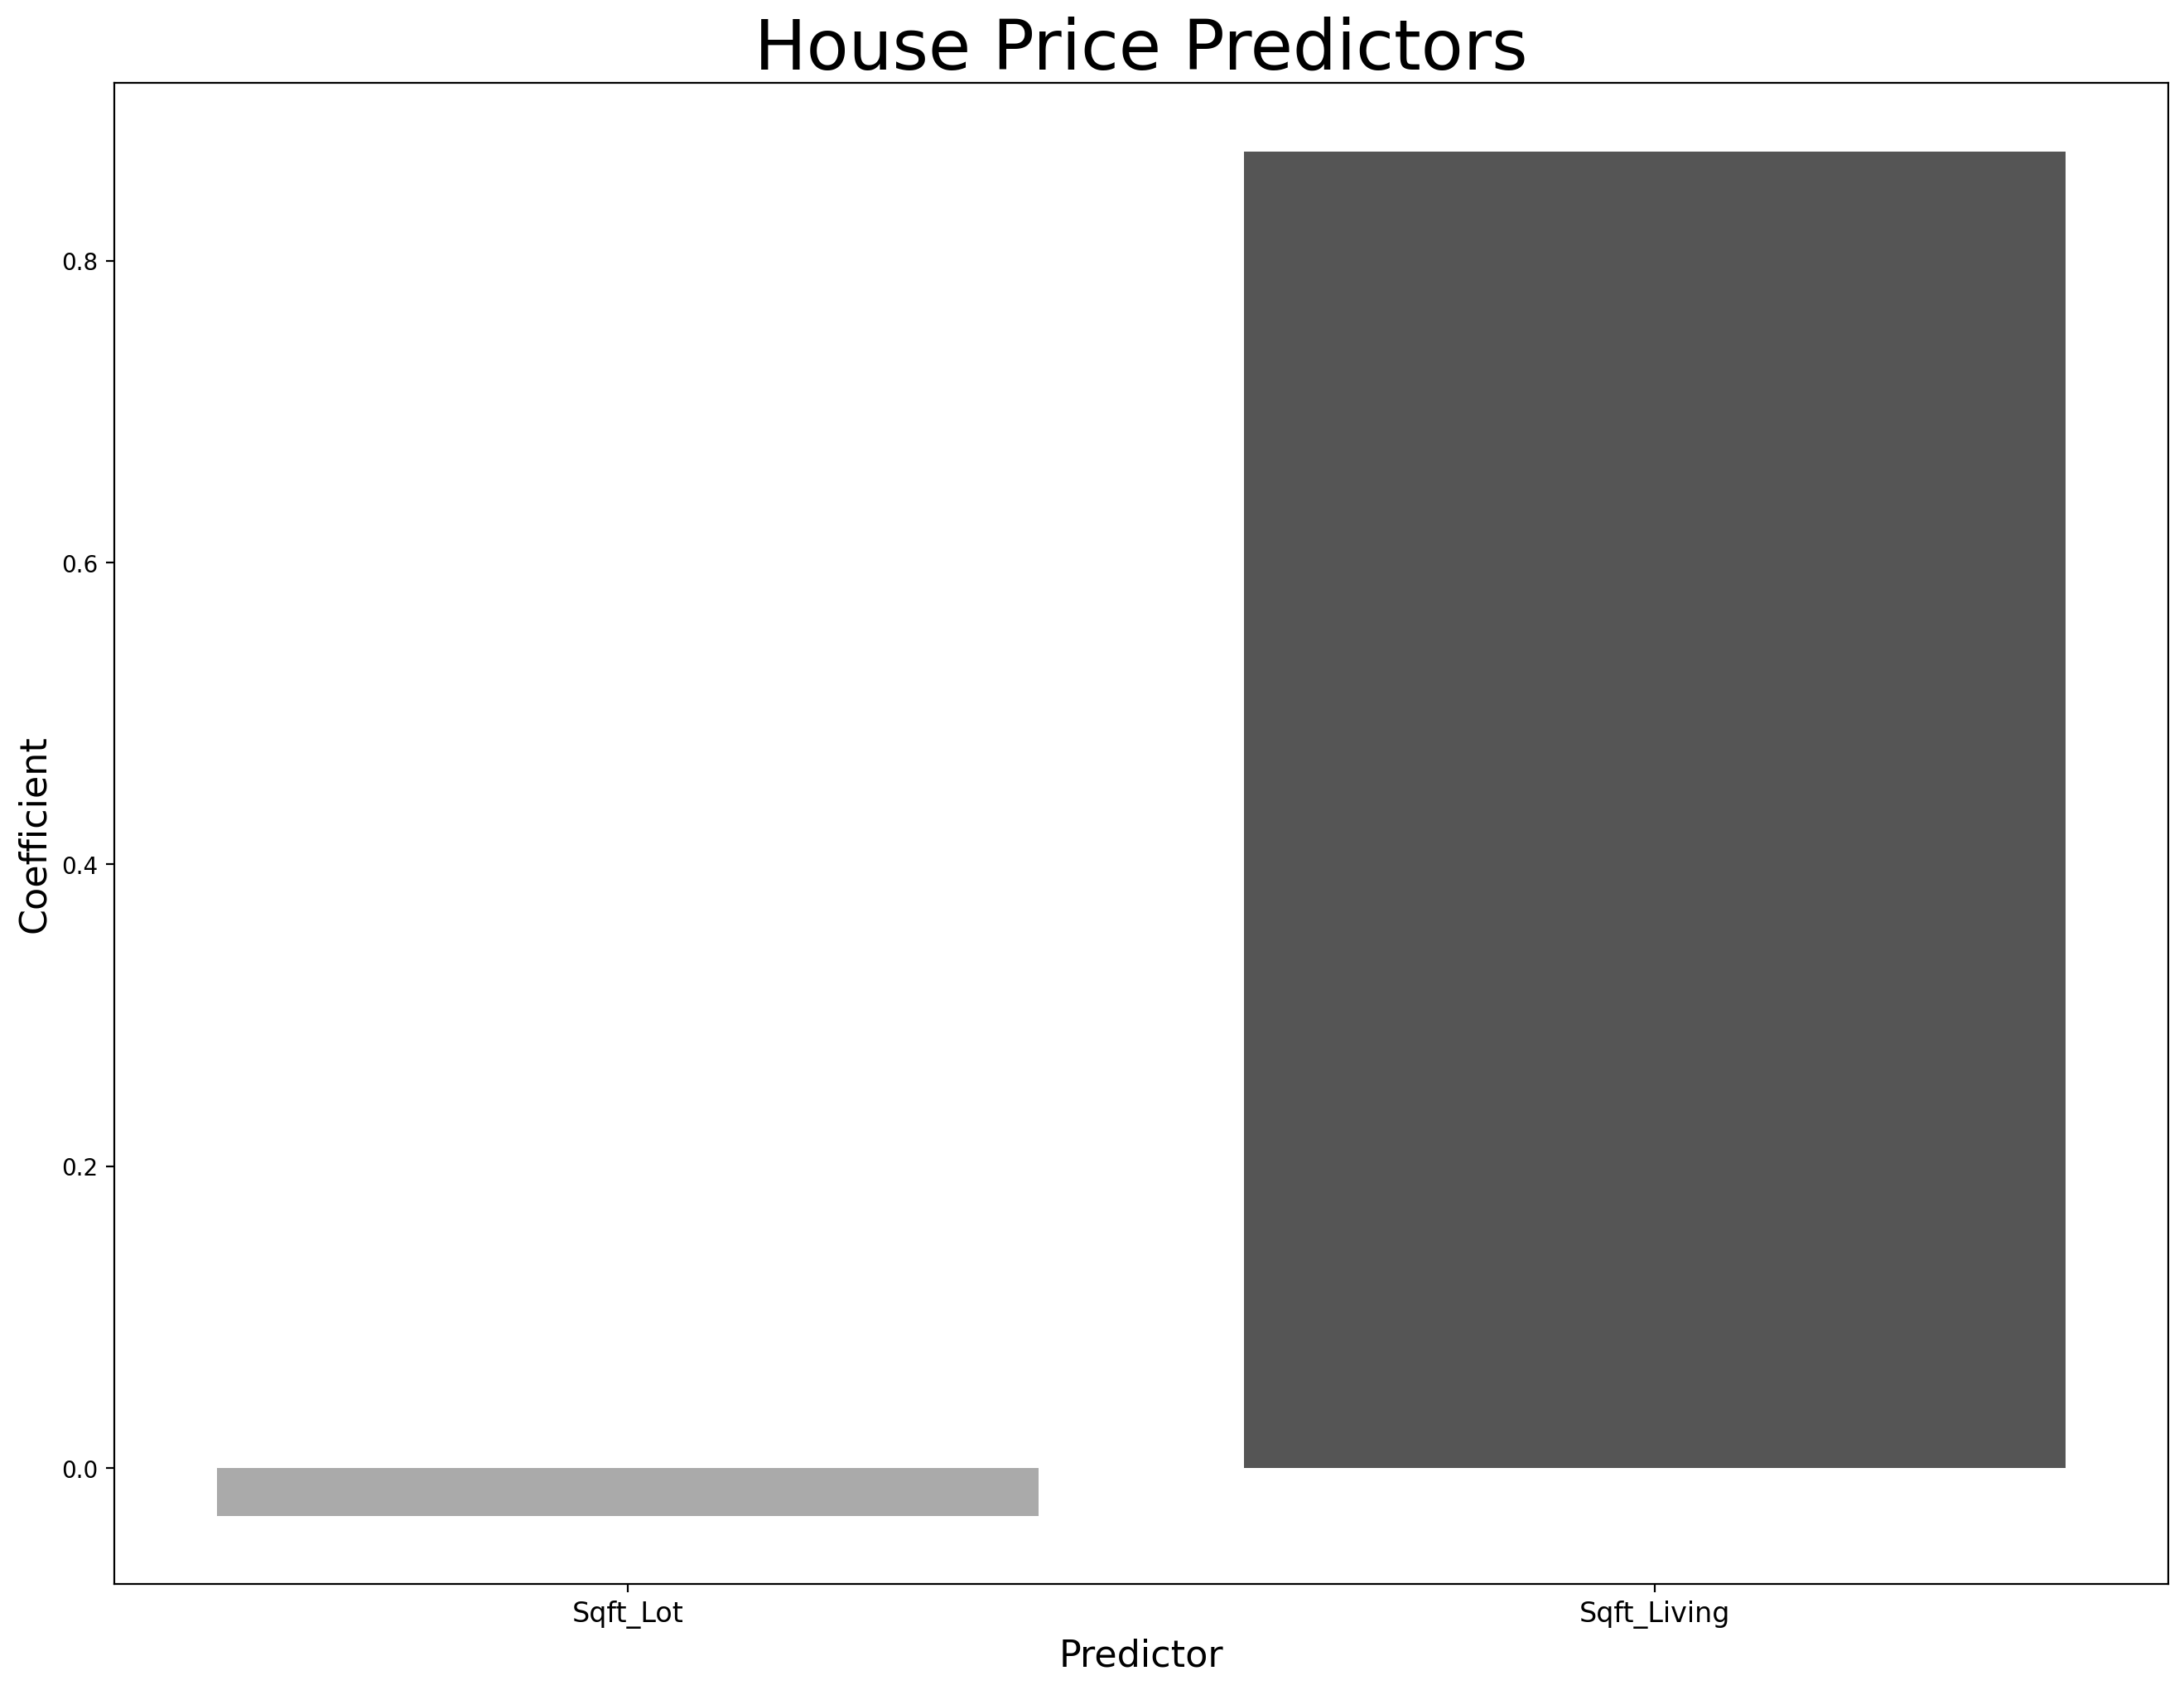

In [214]:
fig, ax = plt.subplots(figsize=(16,12), dpi=200)
ax = sns.barplot(x=plotdf['Predictor'], y=plotdf['Coefficient'], palette="binary",)
ax.set_title('House Price Predictors', fontsize=30)
ax.set_xlabel('Predictor', fontsize=16)
ax.set_ylabel('Coefficient', fontsize=16)
labels = ['Sqft_Lot', 'Sqft_Living']
ax.set_xticklabels(labels, fontsize=12);

In [215]:
# Regression coefficients tells whether there is a positive or negative correlation between the independent variable and dependent variable

In addition, it was found that the strongest home price predictor was sqft_living, which is what we expected.

### Comparing Three Significant Coefficients For Actionable Insights

In [216]:
plotdf = pd.DataFrame({'Predictor':['sqft_living_log', 'bathrooms', 'floors', 'bedrooms', 'cond_fair', 'cond_poor'],
                       'Coefficient':[0.872357, 0.130366, 0.113867, -0.091067, -0.193930, -0.200616]})
plotdf = plotdf.sort_values(by=['Coefficient'])

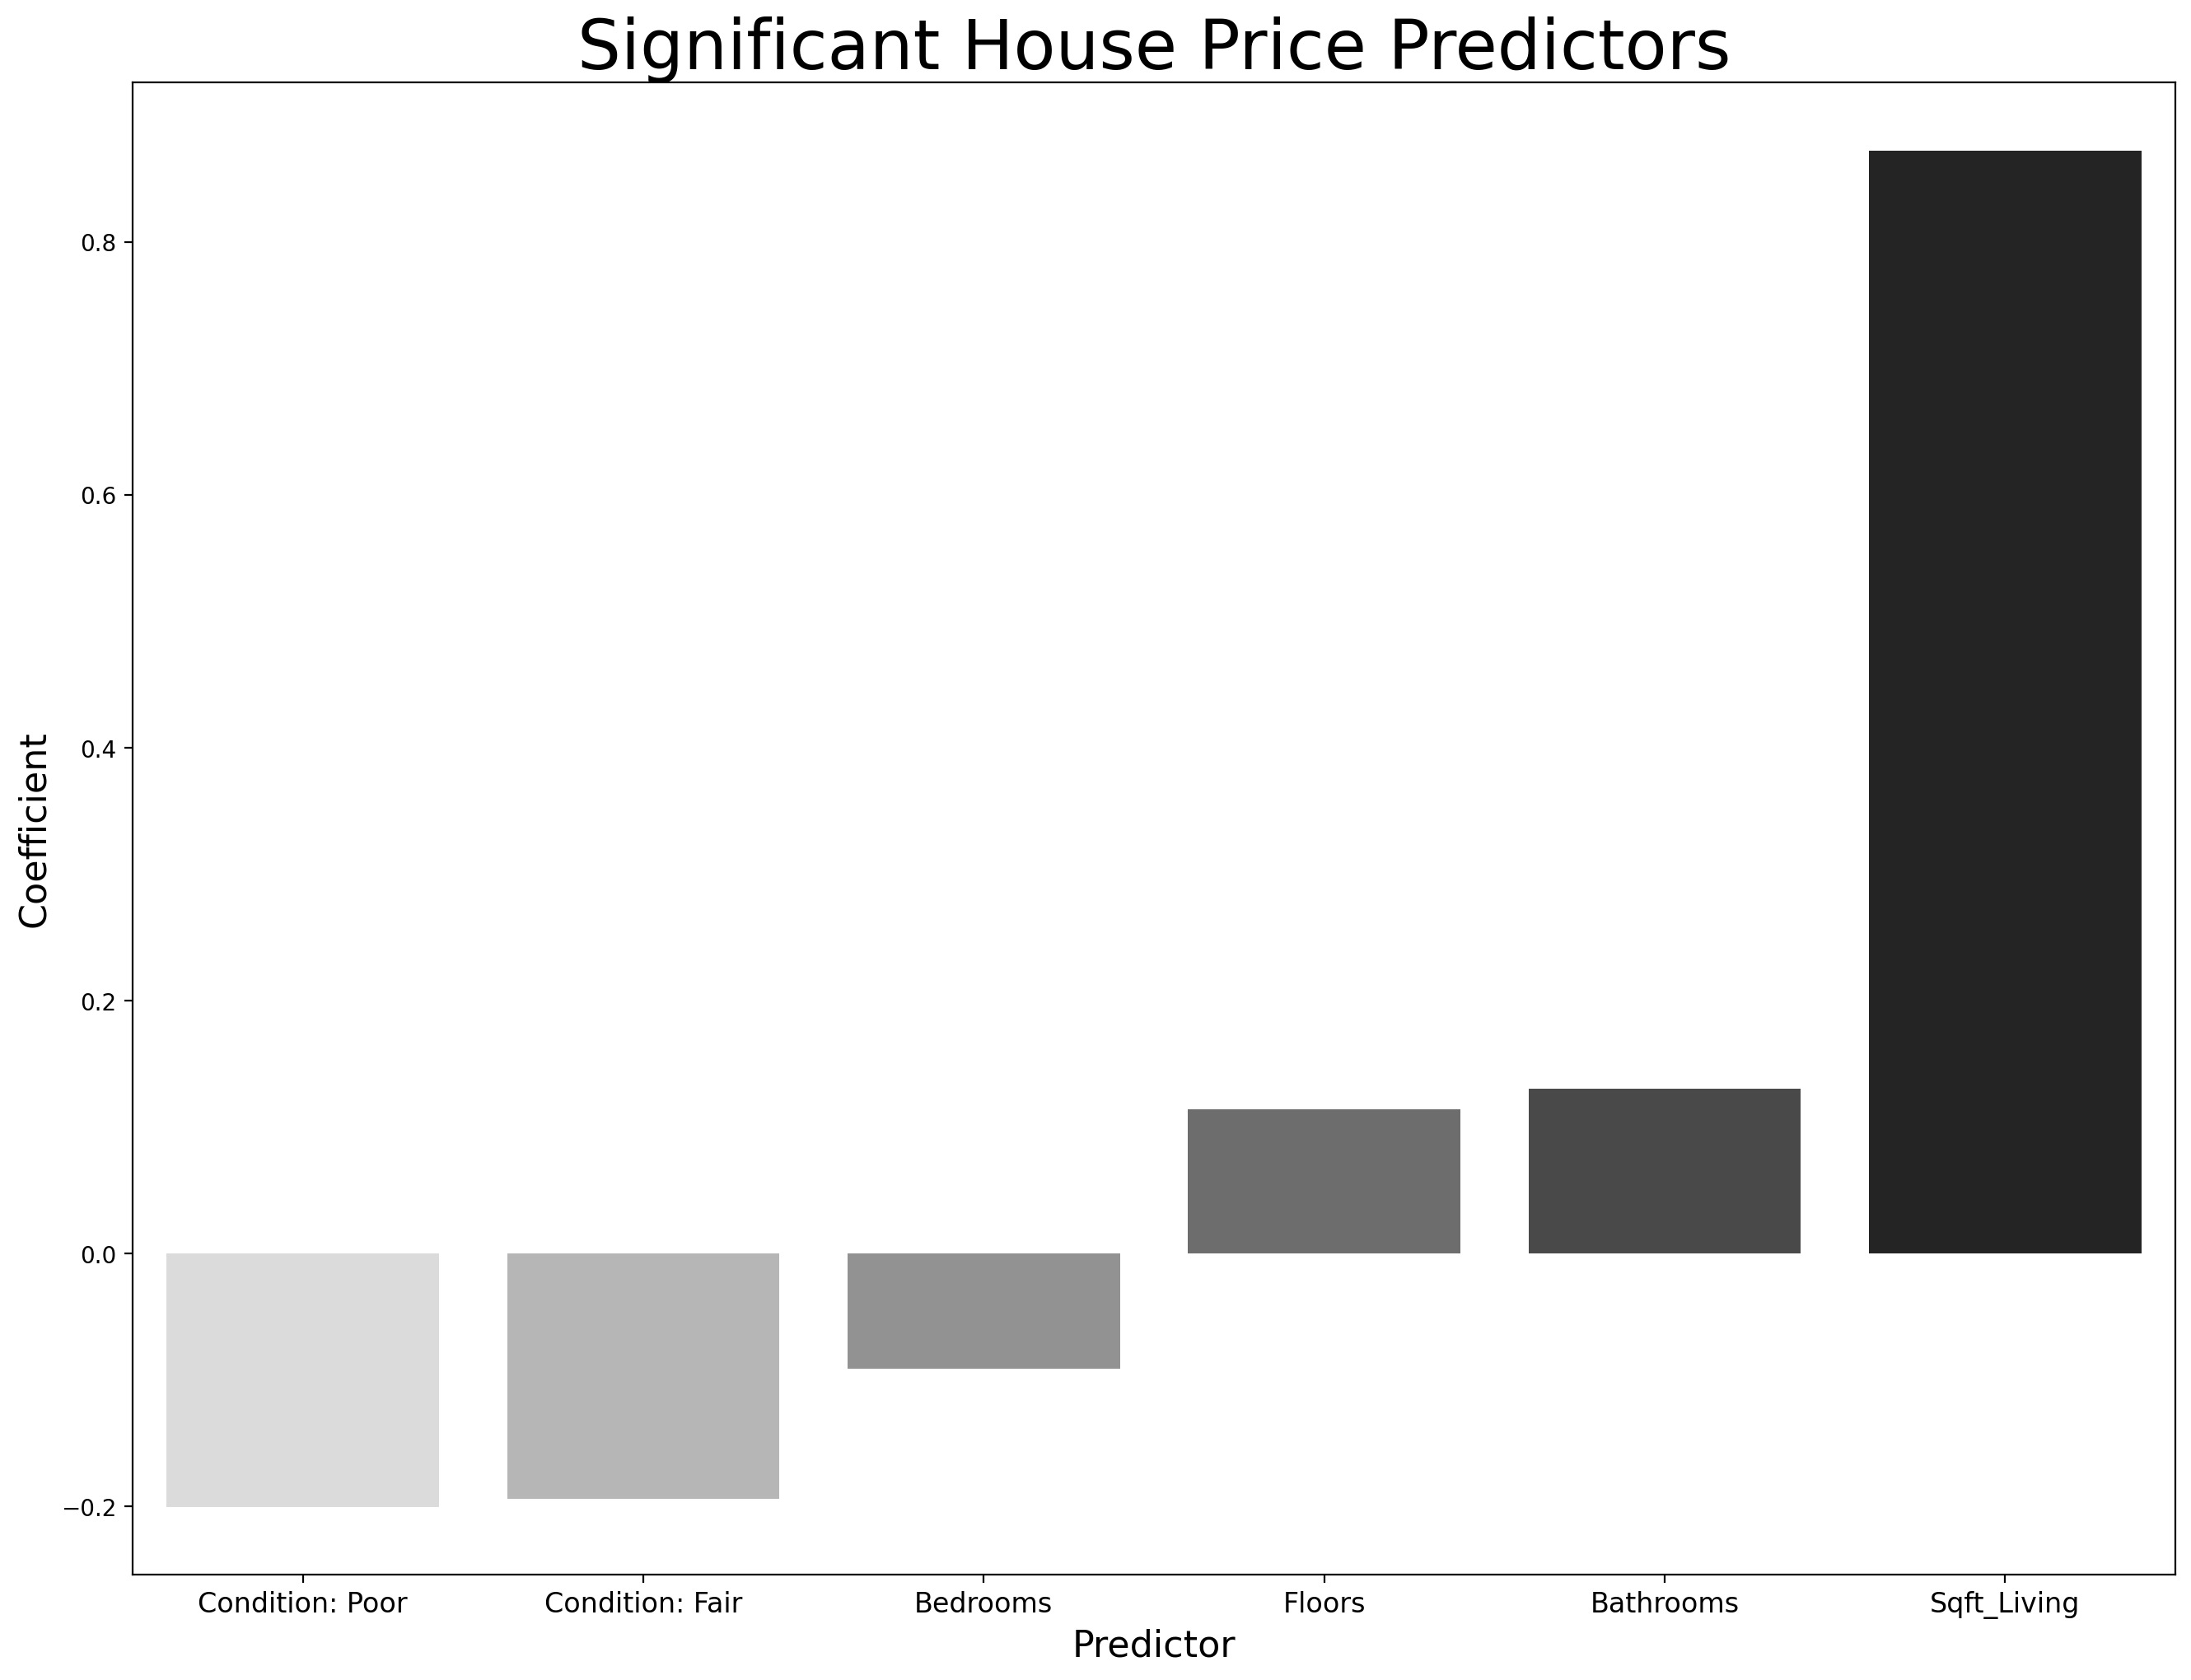

In [217]:
fig, ax = plt.subplots(figsize=(16,12), dpi=200)
ax = sns.barplot(x=plotdf['Predictor'], y=plotdf['Coefficient'], palette="binary",)
ax.set_title('Significant House Price Predictors', fontsize=30)
ax.set_xlabel('Predictor', fontsize=16)
ax.set_ylabel('Coefficient', fontsize=16)
labels = ['Condition: Poor', 'Condition: Fair', 'Bedrooms', 'Floors', 'Bathrooms', 'Sqft_Living']
ax.set_xticklabels(labels, fontsize=12);

#### Interpreting The Coefficients

- For every increase in the home's square foot of living, the home price increases by 87%
- For every addition of a bathroom, the home price increases by 13%
- For every addition of a floor, the home price increases by 11%
- For every addition of a bedroom, the home price decreases by 9%
- Compared to the average home condition category being in the fair home condition category, the home price decreases by 19%
- Compared to the average home condition category being in the poor home condition category, the home price decreases by 20%

#### Recommendations Based Off Results:
1. The real estate agency should conduct home renovations that increase a home's square foot of living, as this is by far the most lucrative home price predictor
2. The real estate agency should focus on home renovations that include increasing the number of bathrooms, floors, and square foot of living as these all will ultimately increase a home's value
3. The real estate agency should not waste time renovating homes that are in poor conditions 

## Conclusion

In the modeling stage, several types of models were made. After comparing each model to one another, it was determined that my third/final multiple regression model had the highest adjusted R-squared value. What does this mean? Since my third model had the highest adjusted R-squared value, it better fits my observation. It will be the model we will use to make predictions going forward since most of the scattered data points are centered/normalized around the line of best fit; there are smaller differences between observed data and fitted values (fitted values are on the line of best fit).

In [219]:
# Adjusted R-Squared accounts for any possibility of overfitting or underfitting. It adjusts the R-squared accordingly.

In the future, we should conduct further work to investigate the multicollinerarity in our final model. Also, I think it would be useful to include more predicitive factors besides sqft_living and sqft_lot. This will help to get a better understanding of what other types of home renovation factors would be useful in increasing the values of homes.